In [1]:
# We will use the following packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd 'Documents/GitHub/pmx_gasoline_theft_prediction'

/Users/jorgeroa/Documents/GitHub/pmx_gasoline_theft_prediction


In [34]:
# Importing our data

df_thefts_PMX = pd.read_excel("data/df_thefts_PMX_final_v2.xlsx", converters={'CVEGEO' : str})

df_thefts_PMX.dtypes

Mun_code             int64
Pipe_intersec        int64
Gas_stations       float64
Gas_price          float64
Confront_events      int64
IRS                float64
Homic_rate         float64
Susceptible          int64
SBASC              float64
POB_6_16_NEB       float64
POB_16_EBI         float64
NO_SS              float64
OVPT               float64
NO_SANIT           float64
OVSAE              float64
NO_DREN            float64
NO_ELECT           float64
NO_LAVA            float64
No_REFRI           float64
dtype: object

In [38]:
df_thefts_PMX.describe().round()

,Mun_code,Pipe_intersec,Gas_stations,Gas_price,Confront_events,IRS,Homic_rate,Susceptible,SBASC,POB_6_16_NEB,POB_16_EBI,NO_SS,OVPT,NO_SANIT,OVSAE,NO_DREN,NO_ELECT,NO_LAVA,No_REFRI
count,839.0,839.0,839.0,729.0,839.0,839.0,839.0,839.0,839.0,839.0,839.0,839.0,837.0,839.0,838.0,837.0,832.0,839.0,839.0
mean,19745.0,23.0,123.0,18.0,0.0,-1.0,22.0,1.0,7.0,5.0,42.0,19.0,4.0,4.0,7.0,9.0,1.0,35.0,19.0
std,8569.0,93.0,515.0,1.0,2.0,1.0,24.0,1.0,6.0,3.0,13.0,7.0,5.0,5.0,9.0,11.0,2.0,18.0,14.0
min,1001.0,0.0,0.0,8.0,0.0,-2.0,0.0,0.0,1.0,1.0,12.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
25%,13064.0,2.0,5.0,18.0,0.0,-1.0,7.0,0.0,3.0,3.0,32.0,13.0,1.0,1.0,1.0,2.0,0.0,21.0,8.0
50%,20197.0,4.0,20.0,18.0,0.0,-1.0,14.0,1.0,6.0,4.0,42.0,19.0,3.0,2.0,3.0,5.0,1.0,32.0,15.0
75%,29006.0,10.0,63.0,18.0,0.0,-0.0,27.0,1.0,10.0,5.0,51.0,24.0,5.0,5.0,8.0,12.0,2.0,45.0,24.0
max,32057.0,1192.0,5979.0,20.0,32.0,4.0,215.0,1.0,37.0,39.0,82.0,52.0,53.0,39.0,75.0,76.0,34.0,97.0,86.0


In [7]:
social_variables = df_thefts_PMX.columns.drop(['Mun_code', 'Susceptible'])
social_variables

Index(['Pipe_intersec', 'Gas_stations', 'Gas_price', 'Confront_events', 'IRS',
       'Homic_rate', 'SBASC', 'POB_6_16_NEB', 'POB_16_EBI', 'NO_SS', 'OVPT',
       'NO_SANIT', 'OVSAE', 'NO_DREN', 'NO_ELECT', 'NO_LAVA', 'No_REFRI'],
      dtype='object')

In [8]:
#Fill 0s in Gas_prices NaN values

for key in social_variables:
  df_thefts_PMX[key] = df_thefts_PMX[key].fillna(0)

df_thefts_PMX.head()

,Mun_code,Pipe_intersec,Gas_stations,Gas_price,Confront_events,IRS,Homic_rate,Susceptible,SBASC,POB_6_16_NEB,POB_16_EBI,NO_SS,OVPT,NO_SANIT,OVSAE,NO_DREN,NO_ELECT,NO_LAVA,No_REFRI
0,1001,22,1.35,17.78,0,-1.3456,5.41,1,1.887423,3.914694,23.463147,15.751315,0.558267,0.434323,0.539714,0.405613,0.185406,13.135097,4.976815
1,1002,3,21.29,17.93,0,-0.8732,4.13,0,4.053829,3.934379,38.616333,8.822640,1.593414,4.890338,1.171607,4.973795,0.997579,21.077503,13.729702
2,1004,5,76.76,17.85,0,-1.0391,6.20,0,3.835153,3.753315,30.835403,8.218243,1.335823,2.530502,0.671326,1.624260,0.697120,21.213440,11.657586
3,1005,5,18.80,17.84,0,-1.1825,4.83,0,2.887218,4.803344,30.812283,16.580066,1.043769,0.840948,0.911164,0.748003,0.439924,14.073904,6.988933
4,1006,8,31.76,17.83,0,-1.1859,4.26,1,3.120712,3.307964,28.773867,13.255280,0.696114,1.460176,1.117155,1.157367,0.667693,15.313592,8.822952


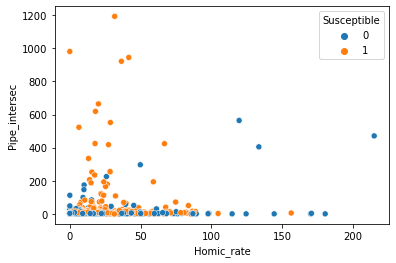

In [9]:
# scatter plot using 

sns.scatterplot(x = "Homic_rate", 
                y = "Pipe_intersec", 
                hue = "Susceptible", data = df_thefts_PMX);

In [10]:
df_thefts_PMX

,Mun_code,Pipe_intersec,Gas_stations,Gas_price,Confront_events,IRS,Homic_rate,Susceptible,SBASC,POB_6_16_NEB,POB_16_EBI,NO_SS,OVPT,NO_SANIT,OVSAE,NO_DREN,NO_ELECT,NO_LAVA,No_REFRI
0,1001,22,1.35,17.78,0,-1.3456,5.41,1,1.887423,3.914694,23.463147,15.751315,0.558267,0.434323,0.539714,0.405613,0.185406,13.135097,4.976815
1,1002,3,21.29,17.93,0,-0.8732,4.13,0,4.053829,3.934379,38.616333,8.822640,1.593414,4.890338,1.171607,4.973795,0.997579,21.077503,13.729702
2,1004,5,76.76,17.85,0,-1.0391,6.20,0,3.835153,3.753315,30.835403,8.218243,1.335823,2.530502,0.671326,1.624260,0.697120,21.213440,11.657586
3,1005,5,18.80,17.84,0,-1.1825,4.83,0,2.887218,4.803344,30.812283,16.580066,1.043769,0.840948,0.911164,0.748003,0.439924,14.073904,6.988933
4,1006,8,31.76,17.83,0,-1.1859,4.26,1,3.120712,3.307964,28.773867,13.255280,0.696114,1.460176,1.117155,1.157367,0.667693,15.313592,8.822952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,32050,3,0.00,0.00,0,-1.0008,50.07,0,4.461622,4.165169,36.423129,11.567853,0.786746,3.046895,2.969846,2.997159,0.474186,14.449122,10.916527
835,32051,0,40.83,18.05,0,-0.6686,31.43,1,5.448608,4.606946,47.723023,13.052967,2.531589,8.423299,0.978858,9.255142,1.069363,21.042373,14.499824
836,32052,4,0.00,0.00,0,-0.9435,0.00,0,3.518796,3.019944,32.398168,17.443852,1.521418,4.548395,2.997877,6.015325,1.112863,24.032564,14.869227
837,32056,3,9.19,17.61,0,-1.4022,59.65,0,1.319611,2.739716,21.493228,15.214505,0.334322,0.914969,1.443085,0.727765,0.171016,11.393664,5.131517


In [20]:
# We will now set data and target 
X = df_thefts_PMX.drop(columns=['Mun_code', 'Susceptible'])
y = df_thefts_PMX["Susceptible"]
X

,Pipe_intersec,Gas_stations,Gas_price,Confront_events,IRS,Homic_rate,SBASC,POB_6_16_NEB,POB_16_EBI,NO_SS,OVPT,NO_SANIT,OVSAE,NO_DREN,NO_ELECT,NO_LAVA,No_REFRI
0,22,1.35,17.78,0,-1.3456,5.41,1.887423,3.914694,23.463147,15.751315,0.558267,0.434323,0.539714,0.405613,0.185406,13.135097,4.976815
1,3,21.29,17.93,0,-0.8732,4.13,4.053829,3.934379,38.616333,8.822640,1.593414,4.890338,1.171607,4.973795,0.997579,21.077503,13.729702
2,5,76.76,17.85,0,-1.0391,6.20,3.835153,3.753315,30.835403,8.218243,1.335823,2.530502,0.671326,1.624260,0.697120,21.213440,11.657586
3,5,18.80,17.84,0,-1.1825,4.83,2.887218,4.803344,30.812283,16.580066,1.043769,0.840948,0.911164,0.748003,0.439924,14.073904,6.988933
4,8,31.76,17.83,0,-1.1859,4.26,3.120712,3.307964,28.773867,13.255280,0.696114,1.460176,1.117155,1.157367,0.667693,15.313592,8.822952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,3,0.00,0.00,0,-1.0008,50.07,4.461622,4.165169,36.423129,11.567853,0.786746,3.046895,2.969846,2.997159,0.474186,14.449122,10.916527
835,0,40.83,18.05,0,-0.6686,31.43,5.448608,4.606946,47.723023,13.052967,2.531589,8.423299,0.978858,9.255142,1.069363,21.042373,14.499824
836,4,0.00,0.00,0,-0.9435,0.00,3.518796,3.019944,32.398168,17.443852,1.521418,4.548395,2.997877,6.015325,1.112863,24.032564,14.869227
837,3,9.19,17.61,0,-1.4022,59.65,1.319611,2.739716,21.493228,15.214505,0.334322,0.914969,1.443085,0.727765,0.171016,11.393664,5.131517


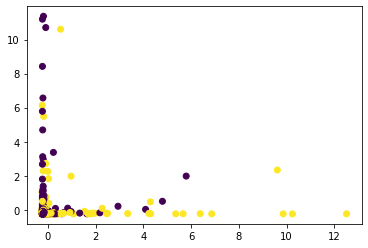

In [21]:
# Preprocessing the data

X_new = StandardScaler().fit_transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1], c=y);

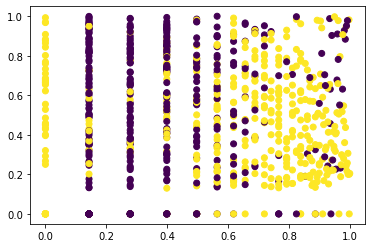

In [22]:
# QuantileTransformer

from sklearn.preprocessing import QuantileTransformer

X_new2 = QuantileTransformer(n_quantiles = 500).fit_transform(X)
plt.scatter(X_new2[:, 0], X_new2[:, 1], c=y);

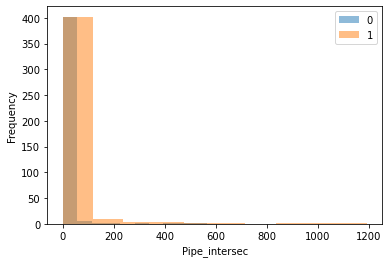

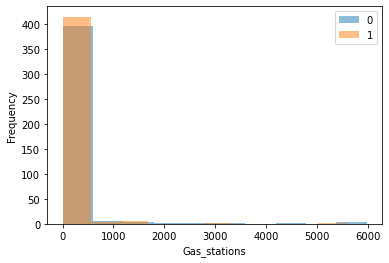

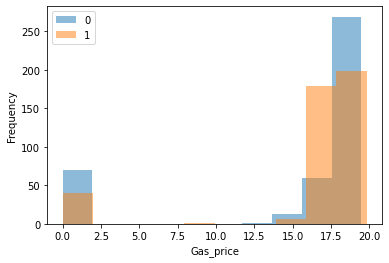

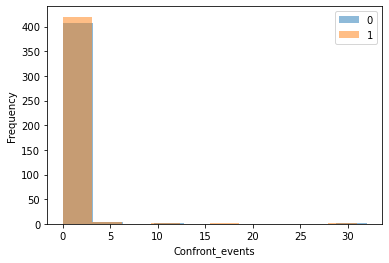

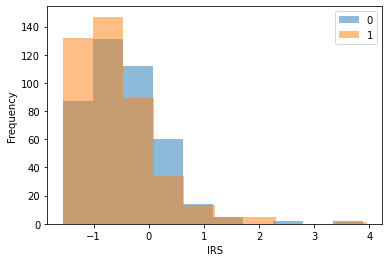

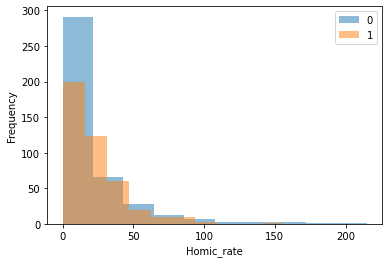

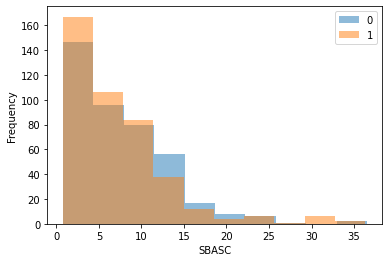

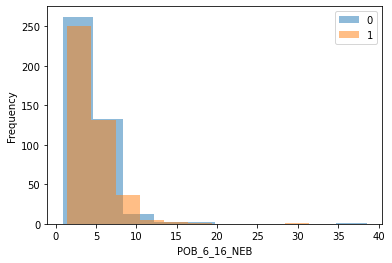

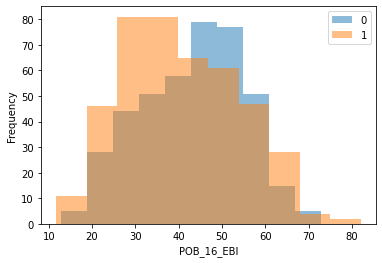

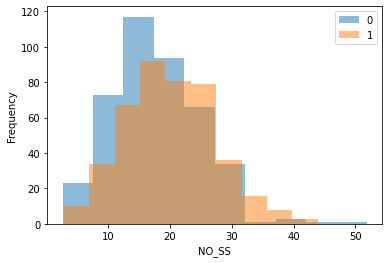

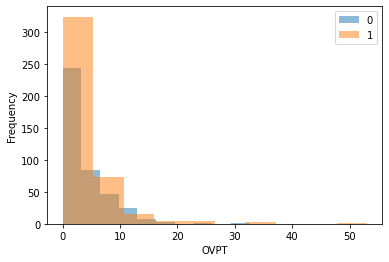

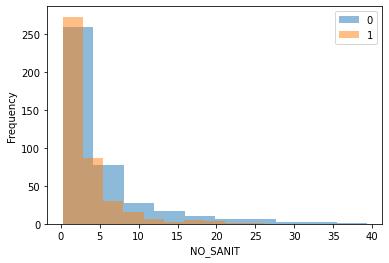

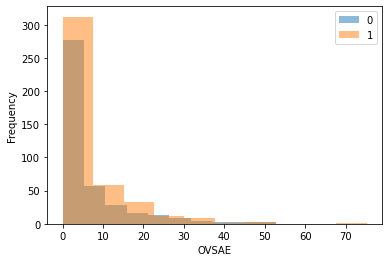

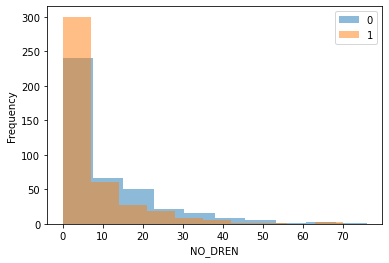

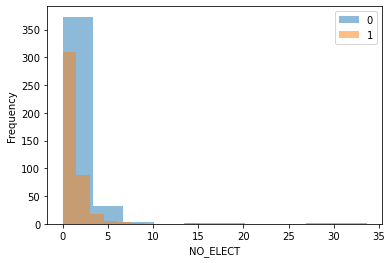

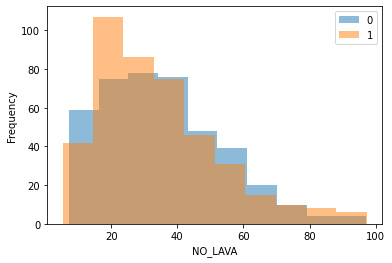

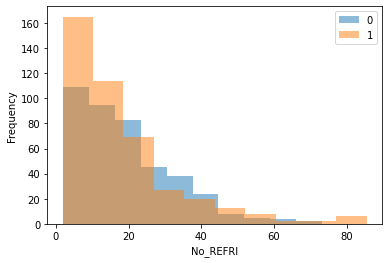

In [23]:
#Check the variables distribution - histogram

# Plot one histogram per variable

for variable_name in df_thefts_PMX[['Pipe_intersec', 'Gas_stations', 'Gas_price',
                                    'Confront_events', 'IRS', 'Homic_rate', 'SBASC', 'POB_6_16_NEB',
                                    'POB_16_EBI', 'NO_SS', 'OVPT', 'NO_SANIT', 'OVSAE', 'NO_DREN',
                                    'NO_ELECT', 'NO_LAVA', 'No_REFRI']]:
                                   plt.figure()
                                   # plot the histogram for each specie
                                   df_thefts_PMX.groupby("Susceptible")[variable_name].plot.hist(alpha=0.5, legend=True)
                                   plt.xlabel(variable_name)

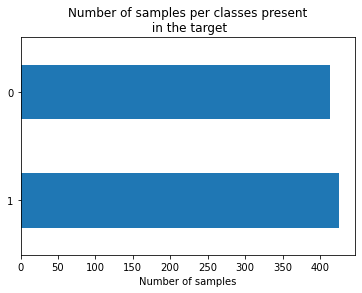

In [24]:
import matplotlib.pyplot as plt

y.value_counts().plot.barh()
plt.xlabel("Number of samples")
_ = plt.title("Number of samples per classes present\n in the target")

In [25]:
# Set up training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, shuffle=True, random_state=123, test_size=0.3)

In [26]:
# Preprocessing the data
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

pipe = Pipeline([('scaler', StandardScaler()), 
                 ('model', LogisticRegression())
                 ])

#pipe.fit(X_train, y_train)
classifier = pipe.fit(X_train, y_train)





In [27]:
# Here we predict using our unseen data (X_test)
#classifier = LogisticRegression()
target_predicted = pipe.predict(X_test)


In [28]:
accuracy = accuracy_score(y_test, target_predicted)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.5635


In [29]:
mean_absolute_error(y_test, target_predicted)

0.4365079365079365

In [30]:
classifier.score(X_test, y_test)

0.5634920634920635

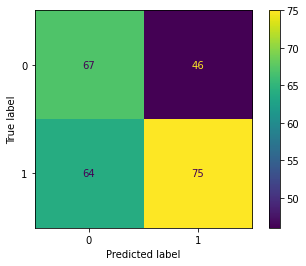

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay

_ = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test) 

In [32]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, target_predicted)
recall = recall_score(y_test, target_predicted)

print(f"Precision score: {precision:.4f}")
print(f"Recall score: {recall:.4f}")

Precision score: 0.6198
Recall score: 0.5396


In [33]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy = balanced_accuracy_score(y_test, target_predicted)
print(f"Balanced accuracy: {balanced_accuracy:.4f}")

Balanced accuracy: 0.5662
